In [1]:
%load_ext dotenv
%dotenv

In [2]:
import os
import sys


In [5]:
sys.path.append(os.getenv('SRC_DIR'))
from logger import get_logger
_logs = get_logger(__name__)

In [6]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
from glob import glob

C:\Users\ritup\AppData\Local\Temp\ipykernel_26804\1500862777.py:1: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask DataFrame will use new implementation that
contains several improvements including a logical query planning.
The user-facing DataFrame API will remain unchanged.

The new implementation is already available and can be enabled by
installing the dask-expr library:

    $ pip install dask-expr

and turning the query planning option on:

    >>> import dask
    >>> dask.config.set({'dataframe.query-planning': True})
    >>> import dask.dataframe as dd

API documentation for the new implementation is available at
https://docs.dask.org/en/stable/dask-expr-api.html

Any feedback can be reported on the Dask issue tracker
https://github.com/dask/dask/issues 

  import dask.dataframe as dd


In [12]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(ft_dir + '/*.parquet')
ft_glob
df = dd.read_parquet(ft_glob).compute().reset_index()


# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [14]:
df.sample(n = 5)

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
208471,HES,2008-12-02,45.000000,45.790001,43.110001,45.060001,36.378059,5346800,Energy,Integrated Oil & Gas,2008,43.709999,0.030885,1,0.0
639374,CTSH,2008-12-26,8.735000,8.830000,8.570000,8.810000,7.967950,4352800,Information Technology,IT Consulting & Other Services,2008,8.715000,0.010901,1,0.0
2369039,ICE,2021-06-15,113.889999,114.680000,113.230003,114.040001,109.109856,2554100,Financials,Financial Exchanges & Data,2021,113.839996,0.001757,1,0.0
859283,COO,2006-08-11,12.002500,12.100000,11.890000,12.027500,11.886470,2430000,Health Care,Health Care Supplies,2006,12.000000,0.002292,1,1.0
886374,RF,2003-04-08,26.202820,26.291916,26.024624,26.178518,13.209085,567546,Financials,Regional Banks,2003,26.146120,0.001239,1,0.0


In [17]:
# select_tickers = df['ticker'].unique().tolist()[0:9]
select_tickers = ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']
select_tickers

['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

In [20]:
idx = df['ticker'].isin(select_tickers)
small_df = df[idx]
simple_sample_dt = small_df.sample(frac = 0.1)
simple_sample_dt.shape, small_df.shape

((5507, 15), (55073, 15))

Look at the distribution of tickers.

<Axes: xlabel='ticker'>

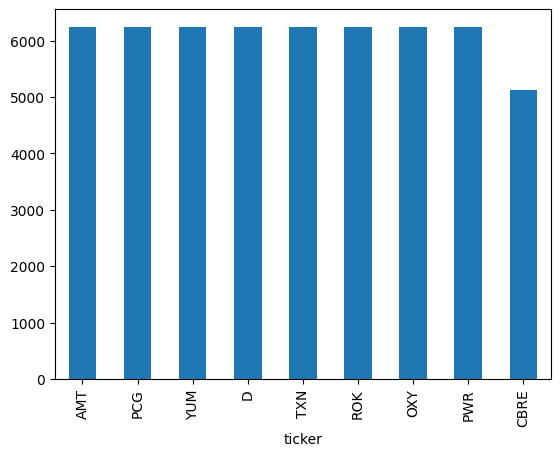

In [21]:
small_df['ticker'].value_counts().plot(kind='bar')

<Axes: xlabel='ticker'>

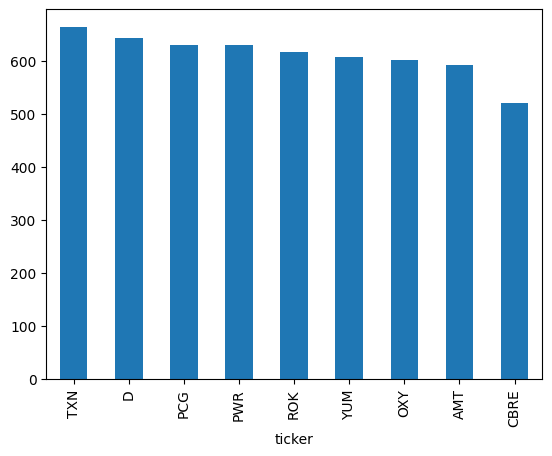

In [22]:
simple_sample_dt['ticker'].value_counts().plot(kind='bar')

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: xlabel='ticker'>

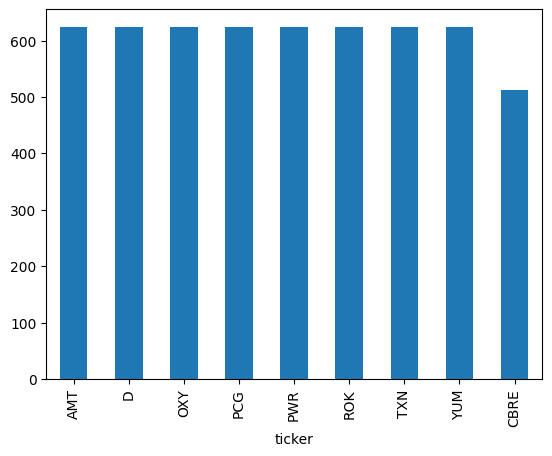

In [23]:
strat_sample_dt = small_df.groupby(['ticker']).sample(frac = 0.1)
strat_sample_dt['ticker'].value_counts().plot(kind='bar')

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

C:\Users\ritup\AppData\Local\Temp\ipykernel_26804\774514019.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  start_sample_dd_dt = (dd_dt


<Axes: xlabel='ticker'>

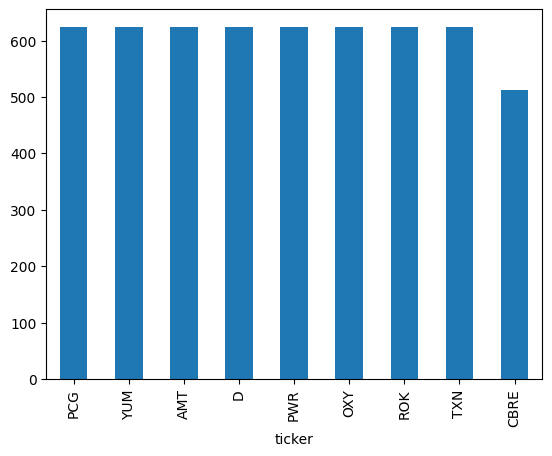

In [26]:
dd_dt = dd.read_parquet(ft_glob)
start_sample_dd_dt = (dd_dt
                      .groupby('ticker', group_keys= False)
                      .apply(lambda x: x.sample(frac = 0.1))
                      .compute()
                      .reset_index()
                      )
start_sample_dd_dt[start_sample_dd_dt['ticker'].isin(select_tickers)]['ticker'].value_counts().plot(kind = 'bar')
                   
